In [1]:
using Distributions, PyPlot, LinearAlgebra

In [2]:
function set_options(ax, xlabel, ylabel, title; grid=true, gridy=false, legend=false)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    if grid
        if gridy
            ax.grid(axis="y")
        else
            ax.grid()
        end
    end
    legend && ax.legend()
end

set_options (generic function with 1 method)

## ベルヌーイモデル

### 生成過程

In [3]:
function generate(N)
    μ = rand(Uniform(0, 1))
    x = rand(Bernoulli(μ), N)
    μ, x
end

generate(5)

(0.7113342941512444, Bool[1, 1, 0, 1, 0])

In [4]:
# 1：表、0：裏
side(x) = x == 1 ? "表" : "裏"

for i in 1:10
    μ, x = generate(5)
    println("コイン $(i), 表が出る確率 μ = $(μ), 出目 x = $(side.(x))")
end

コイン 1, 表が出る確率 μ = 0.8072221066659666, 出目 x = ["表", "表", "表", "表", "表"]
コイン 2, 表が出る確率 μ = 0.42458704117934754, 出目 x = ["表", "表", "裏", "裏", "表"]
コイン 3, 表が出る確率 μ = 0.3289951173708896, 出目 x = ["表", "裏", "裏", "表", "表"]
コイン 4, 表が出る確率 μ = 0.3061994072952383, 出目 x = ["裏", "裏", "裏", "表", "表"]
コイン 5, 表が出る確率 μ = 0.33983699487354335, 出目 x = ["裏", "表", "表", "表", "裏"]
コイン 6, 表が出る確率 μ = 0.9307294221066813, 出目 x = ["表", "表", "表", "表", "表"]
コイン 7, 表が出る確率 μ = 0.7111787136066898, 出目 x = ["表", "表", "表", "表", "表"]
コイン 8, 表が出る確率 μ = 0.6915646969389049, 出目 x = ["表", "表", "表", "裏", "裏"]
コイン 9, 表が出る確率 μ = 0.7002642766331437, 出目 x = ["裏", "裏", "表", "表", "表"]
コイン 10, 表が出る確率 μ = 0.7674840337946114, 出目 x = ["表", "表", "表", "表", "表"]


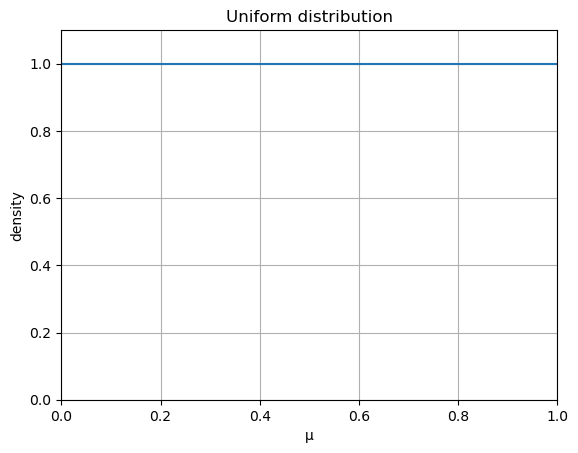

(0.0, 1.1)

In [5]:
μs = range(0, 1, length=100)
fig, ax = subplots()
ax.plot(μs, pdf.(Uniform(0, 1), μs))
set_options(ax, "μ", "density", "Uniform distribution")
ax.set_xlim([0, 1])
ax.set_ylim([0, 1.1])

### 伝承サンプリング

In [6]:
x_obs1 = [0, 0, 0, 1, 1]

5-element Vector{Int64}:
 0
 0
 0
 1
 1

In [7]:
maxiter = 1_000_000
μ_posterior1 = []
for i in 1:maxiter
    μ, x = generate(length(x_obs1))
    
    sum(x) == sum(x_obs1) && push!(μ_posterior1, μ)
end

acceptance_rate = length(μ_posterior1) / maxiter
println("acceptance rate = $(acceptance_rate)")

μ_posterior1'

acceptance rate = 0.166978


1×166978 adjoint(::Vector{Any}) with eltype Any:
 0.223642  0.231134  0.544959  0.365695  …  0.75686  0.609446  0.73046

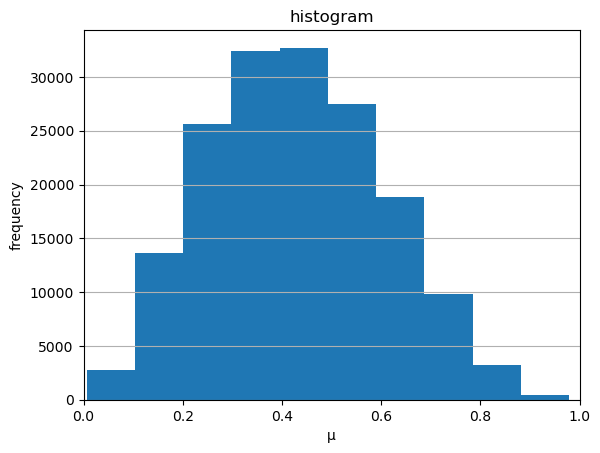

false

In [8]:
# 事後分布
fig, ax = subplots()
ax.hist(μ_posterior1)
ax.set_xlim([0, 1])
set_options(ax, "μ", "frequency", "histogram"; gridy=true)

### 予測

In [9]:
pred1 = mean(rand.(Bernoulli.(μ_posterior1)))
println("$(pred1)")

0.42925415324174443


### 事前分布の変更

In [10]:
function generate2(N)
    μ = rand(Uniform(0, 0.5))
    x = rand(Bernoulli(μ), N)
    μ, x
end
generate2(5)

(0.10488463374707757, Bool[0, 0, 0, 0, 0])

In [11]:
for i in 1:10
    μ, x = generate2(5)
    println("コイン $(i), 表が出る確率 μ = $(μ), 出目 x = $(side.(x))")
end

コイン 1, 表が出る確率 μ = 0.3025899430693123, 出目 x = ["裏", "裏", "裏", "表", "表"]
コイン 2, 表が出る確率 μ = 0.1626592772951766, 出目 x = ["裏", "裏", "裏", "表", "裏"]
コイン 3, 表が出る確率 μ = 0.4517902730144179, 出目 x = ["裏", "裏", "表", "表", "表"]
コイン 4, 表が出る確率 μ = 0.4300778655893551, 出目 x = ["裏", "裏", "裏", "表", "表"]
コイン 5, 表が出る確率 μ = 0.476592239044599, 出目 x = ["表", "表", "裏", "表", "表"]
コイン 6, 表が出る確率 μ = 0.41224388222748587, 出目 x = ["表", "裏", "表", "裏", "裏"]
コイン 7, 表が出る確率 μ = 0.03629207503970722, 出目 x = ["裏", "裏", "裏", "表", "裏"]
コイン 8, 表が出る確率 μ = 0.40137365414541315, 出目 x = ["裏", "裏", "裏", "表", "表"]
コイン 9, 表が出る確率 μ = 0.27019719946874454, 出目 x = ["裏", "裏", "裏", "表", "裏"]
コイン 10, 表が出る確率 μ = 0.04926161476597002, 出目 x = ["裏", "裏", "裏", "裏", "裏"]


### 数値積分による推論計算

$\mu$ 〜 Uniform($\mu$|0, 1)  
$x_1$ 〜 Bernoulli($x_1$|$\mu$)  
...  
この時 　
$p(x_1, ..., x_N, \mu) = p(\mu) \prod_{n=1}^N p(x_n|\mu) = p(\mu) p(X|\mu)$

$p(\mu|X) = \dfrac{p(X|\mu) p(\mu)}{p(X)}$  

ここで、周辺尤度は  
$p(X) = \int p(X|\mu) p(\mu) d\mu$

In [12]:
p_joint(x, μ) = prod(pdf.(Bernoulli(μ), x) * pdf(Uniform(0, 1), μ))

function approx_integration(μ_range, p)
    Δ = μ_range[2] - μ_range[1]
    x -> sum([p(x, μ) * Δ for μ in μ_range]), Δ
end

μ_range = range(0, 1, length=100)

p_marginal, Δ = approx_integration(μ_range, p_joint)

x_obs1 = [0, 0, 0, 1, 1]
x_obs2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]

println("$(p_marginal(x_obs1)), $(p_marginal(x_obs2))")

0.016666666493163274, 3.7801895387034807e-7


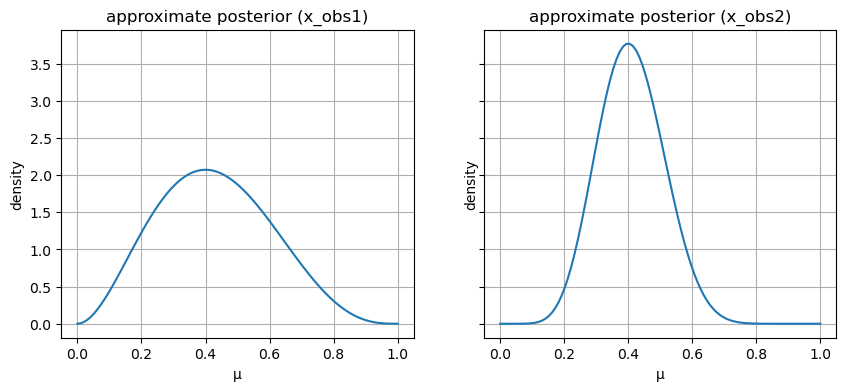

In [13]:
μs = range(0, 1, length=100)

fig, axes = subplots(1, 2, sharey=true, figsize=(10, 4))
for (i, x_obs) in enumerate([x_obs1, x_obs2])
    posterior(μ) = p_joint(x_obs, μ) / p_marginal(x_obs)
    axes[i].plot(μs, posterior.(μs))
    set_options(axes[i], "μ", "density", "approximate posterior (x_obs$(i))")
end

新しいデータ$x_p$に対する予測分布  
$p(x_p|X) = \int p(x_p|\mu) p(\mu|X) d\mu = \int \dfrac{p(x_p|\mu) p(X, \mu)}{p(X)}d\mu$

In [14]:
posterior1(μ) = p_joint(x_obs1, μ) / p_marginal(x_obs1)
posterior2(μ) = p_joint(x_obs2, μ) / p_marginal(x_obs2)
p_inner1(x, μ) = pdf.(Bernoulli(μ), x) * posterior1(μ)
p_inner2(x, μ) = pdf.(Bernoulli(μ), x) * posterior2(μ)

μ_range = range(0, 1, length=100)
pred₁, Δ₁ = approx_integration(μ_range, p_inner1)
pred₂, Δ₂ = approx_integration(μ_range, p_inner2)

println("$(pred₁(1)), $(pred₂(1))")

0.4285714434416308, 0.40909090909090784


### 厳密解法

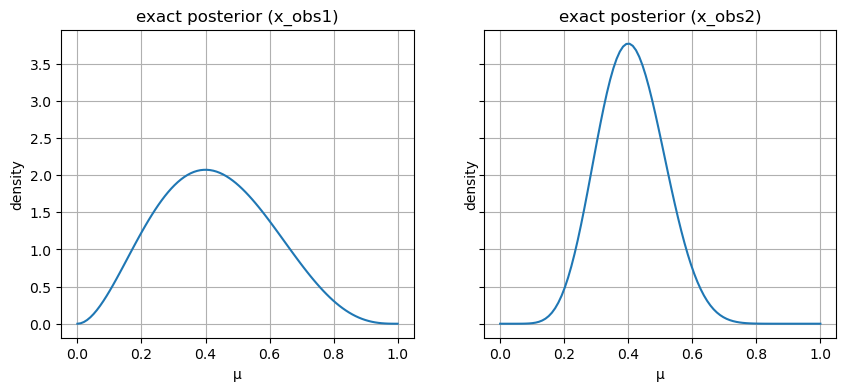

In [15]:
μs = range(0, 1, length=100)

fig, axes = subplots(1, 2, sharey=true, figsize=(10, 4))
for (i, x_obs) in enumerate([x_obs1, x_obs2])
    α = 1.0 + sum(x_obs)
    β = 1.0 + length(x_obs) - sum(x_obs)
    d = Beta(α, β)
    
    axes[i].plot(μs, pdf.(d, μs))
    set_options(axes[i], "μ", "density", "exact posterior (x_obs$(i))")
end

In [16]:
function prediction(x_obs)
    α = 1.0 + sum(x_obs)
    β = 1.0 + length(x_obs) - sum(x_obs)
    α / (α + β)
end

println("$(prediction(x_obs1)), $(prediction(x_obs2))")

0.42857142857142855, 0.4090909090909091


## 線形回帰

### 生成過程

$y \approx w_1 x + w_2$  
$p(Y, w|X) = p(w)\prod_{n=1}^N p(y_n|x_n, w) = \mathcal{N}(w_1|\mu_1, \sigma_1)\mathcal{N}(w_2|\mu_2, \sigma_2)\prod_{n=1}^N \mathcal{N}(y_n|w_1x_n + w_2, \sigma)$

In [23]:
function generate_linear(x, σ, μ₁, μ₂, σ₁, σ₂)
    w₁ = rand(Normal(μ₁, σ₁))
    w₂ = rand(Normal(μ₂, σ₂))
    f(x) = w₁*x + w₂
    y = rand.(Normal.(f.(x), σ))
    y, f, w₁, w₂
end

generate_linear (generic function with 1 method)

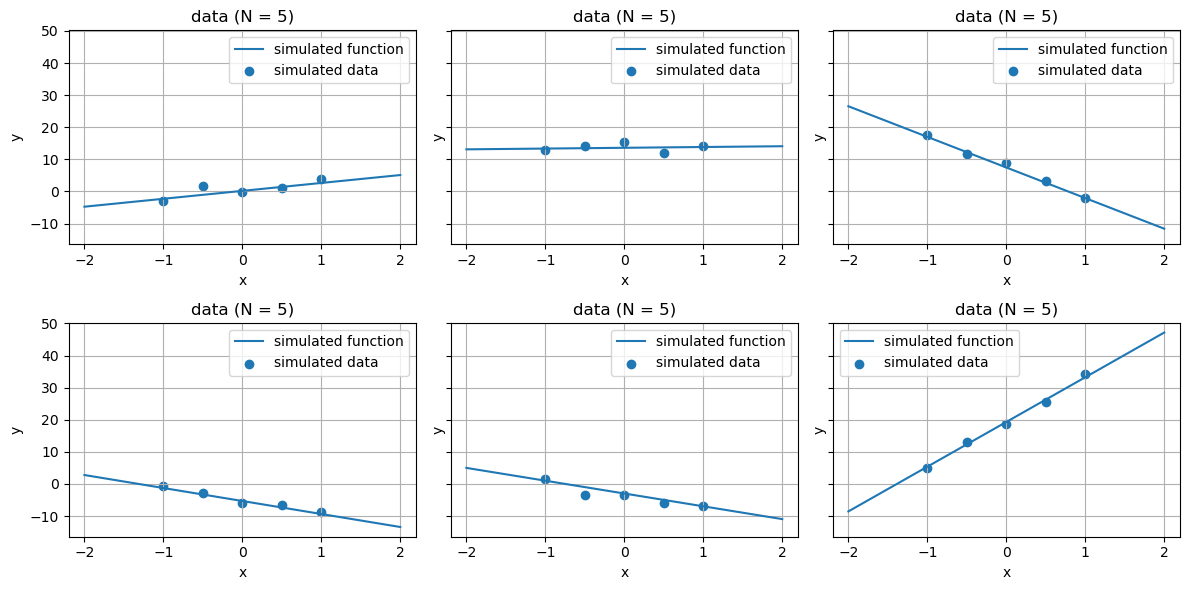

In [24]:
σ = 1.0
μ₁ = 0.0
μ₂ = 0.0
σ₁ = 10.0
σ₂ = 10.0
x = [-1.0, -0.5, 0, 0.5, 1.0]

xs = range(-2, 2, length=100)

fig, axes = subplots(2, 3, sharey=true, figsize=(12, 6))
for ax in axes
    y, f, w₁, w₂ = generate_linear(x, σ, μ₁, μ₂, σ₁, σ₂)
    
    ax.plot(xs, f.(xs), label="simulated function")
    ax.scatter(x, y, label="simulated data")
    
    set_options(ax, "x", "y", "data (N = $(length(x)))", legend=true)
end
tight_layout()

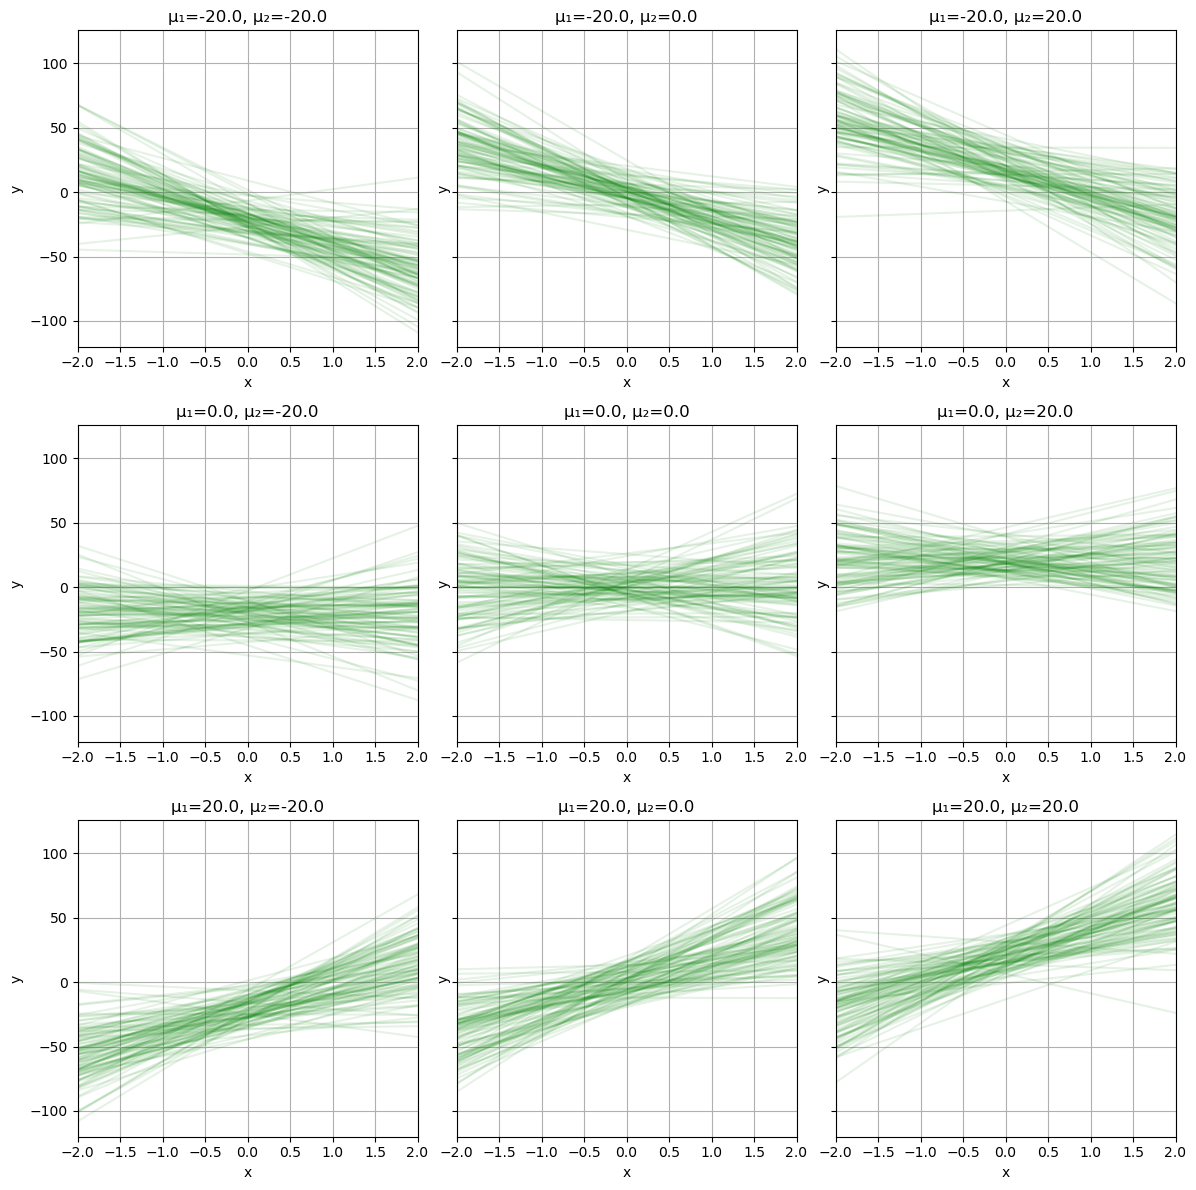

In [25]:
μ₁_list = [-20.0, 0.0, 20.0]
μ₂_list = [-20.0, 0.0, 20.0]

σ₁ = 10.0
σ₂ = 10.0

fig, axes = subplots(length(μ₁_list), length(μ₂_list), sharey=true, figsize=(12, 12))

for (i, μ₁) in enumerate(μ₁_list)
    for (j, μ₂) in enumerate(μ₂_list)
        fs = [generate_linear(x, σ, μ₁, μ₂, σ₁, σ₂)[2] for _ in 1:100]
        
        for f in fs
            axes[i, j].plot(xs, f.(xs), "g", alpha=0.1)
        end
        
        axes[i, j].set_xlim(extrema(xs))
        set_options(axes[i, j], "x", "y", "μ₁=$(μ₁), μ₂=$(μ₂)")
    end
end
tight_layout()

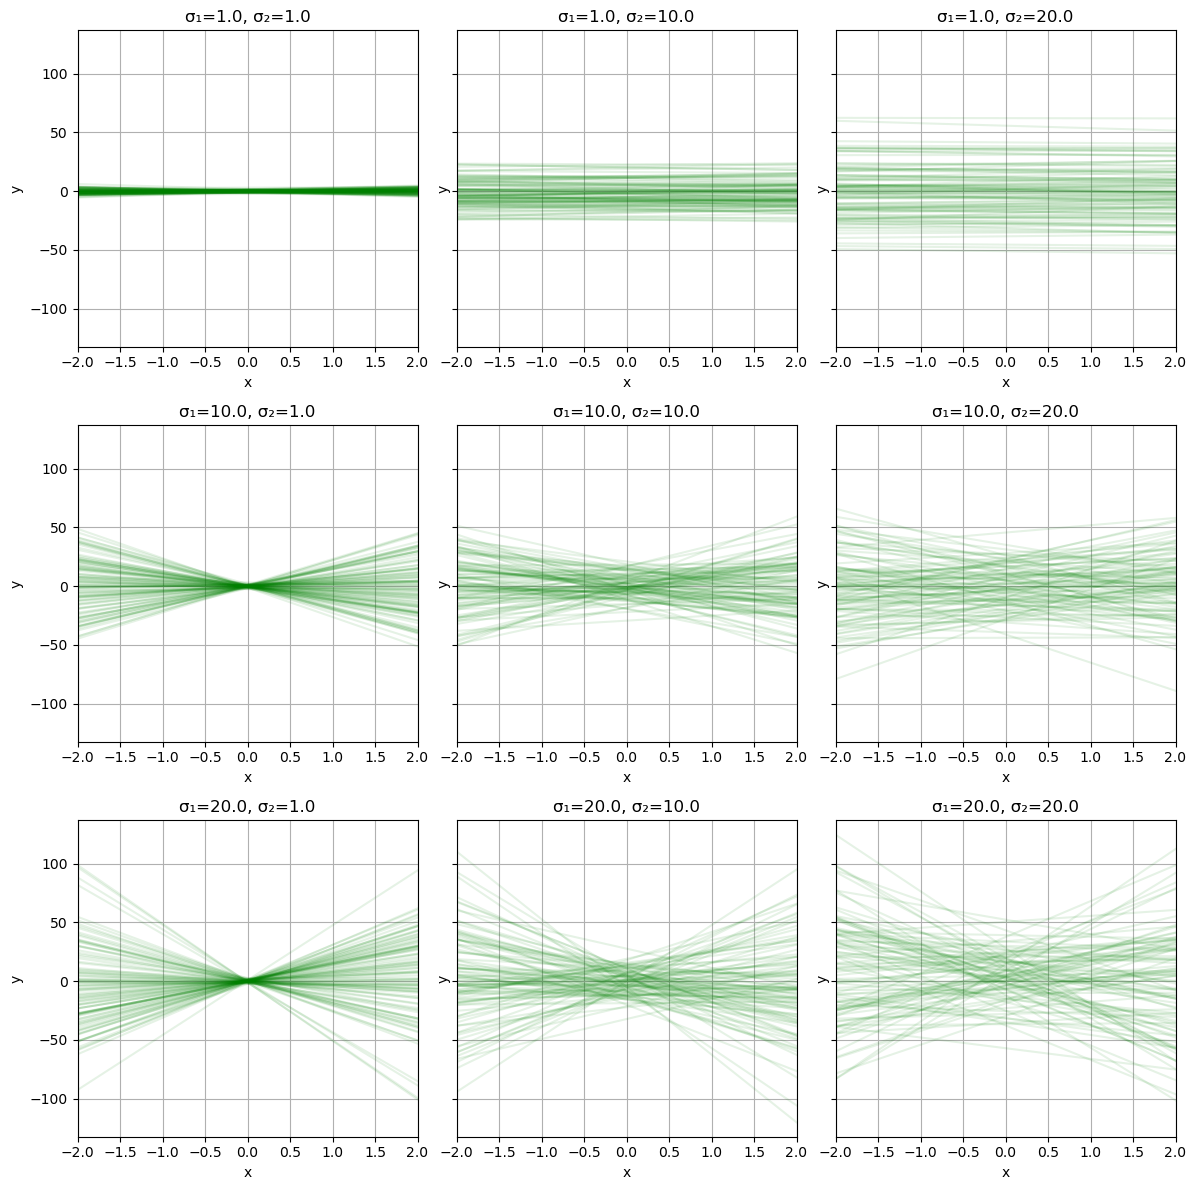

In [26]:
σ₁_list = [1.0, 10.0, 20.0]
σ₂_list = [1.0, 10.0, 20.0]

μ₁ = 0.0
μ₂ = 0.0

fig, axes = subplots(length(σ₁_list), length(σ₂_list), sharey=true, figsize=(12, 12))

for (i, σ₁) in enumerate(σ₁_list)
    for (j, σ₂) in enumerate(σ₂_list)
        fs = [generate_linear(x, σ, μ₁, μ₂, σ₁, σ₂)[2] for _ in 1:100]
        
        for f in fs
            axes[i, j].plot(xs, f.(xs), "g", alpha=0.1)
        end
        
        axes[i, j].set_xlim(extrema(xs))
        set_options(axes[i, j], "x", "y", "σ₁=$(σ₁), σ₂=$(σ₂)")
    end
end
tight_layout()

### 数値積分

$p(w|X, Y) = \dfrac{p(Y|w, X)p(w)}{p(Y|X)} = \dfrac{p(Y|w, X)p(w)}{\int p(Y|w, X)p(w) dw}$

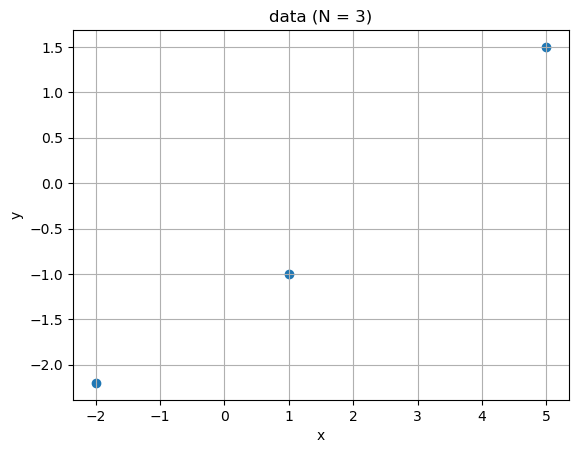

false

In [27]:
x_obs = [-2, 1, 5]

y_obs = [-2.2, -1.0, 1.5]

fig, ax = subplots()
ax.scatter(x_obs, y_obs)
set_options(ax, "x", "y", "data (N = $(length(x_obs)))")

In [29]:
p_joint(x, y, w₁, w₂) = prod(pdf.(Normal.(w₁.*x.+w₂, σ), y)) * pdf(Normal(μ₁, σ₁), w₁) * pdf(Normal(μ₂, σ₂), w₂)

function approx_integration_2D(w_range, p)
    Δ = w_range[2] - w_range[1]
    (x, y) -> sum([p(x, y, w₁, w₂) * Δ^2 for w₁ in w_range, w₂ in w_range])
end

w_range = range(-3, 3, length=100)

p_marginal = approx_integration_2D(w_range, p_joint)
p_marginal(x_obs, y_obs)

6.924264340150274e-5

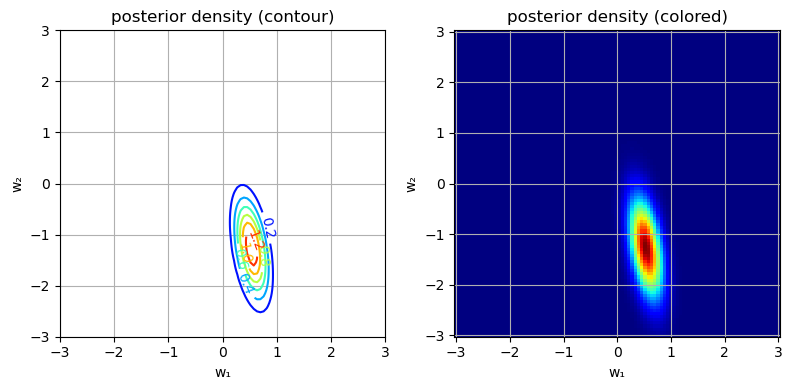

In [30]:
# 事後分布の計算
w_posterior = [p_joint(x_obs, y_obs, w₁, w₂) for w₁ in w_range, w₂ in w_range] ./ p_marginal(x_obs, y_obs)

fig, axes = subplots(1, 2, figsize=(8, 4))

cs = axes[1].contour(w_range, w_range, w_posterior', cmap="jet")
axes[1].clabel(cs, inline=true)
set_options(axes[1], "w₁", "w₂", "posterior density (contour)")

xgrid = repeat(w_range', length(w_range), 1)
ygrid = repeat(w_range, 1, length(w_range))
axes[2].pcolormesh(xgrid, ygrid, w_posterior', cmap="jet", shading="auto")
set_options(axes[2], "w₁", "w₂", "posterior density (colored)")

tight_layout()

新しい入力$x_p$に対する予測値$y_p$の分布 　

$p(y_p|x_p, X, Y) = \int p(y_p|x_p, w)p(w|X, Y) dw$

In [32]:
function approx_predictive(w_posterior, w_range, p)
    Δ = w_range[2] - w_range[1]
    (x, y) -> sum([p(x, y, w₁, w₂) * w_posterior[i, j] * Δ^2 for (i, w₁) in enumerate(w_range), (j, w₂) in enumerate(w_range)])
end

p_likelihood(xₚ, yₚ, w₁, w₂) = pdf(Normal(w₁*xₚ + w₂, σ), yₚ)
p_predictive = approx_predictive(w_posterior, w_range, p_likelihood)

#29 (generic function with 1 method)

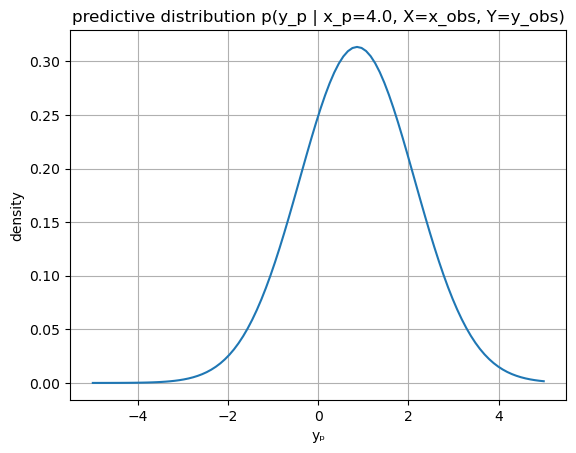

false

In [35]:
xₚ = 4.0

fig, ax = subplots()
ys = range(-5, 5, length=100)
ax.plot(ys, p_predictive.(xₚ, ys))
set_options(ax, "yₚ", "density", "predictive distribution p(y_p | x_p=$(xₚ), X=x_obs, Y=y_obs)")

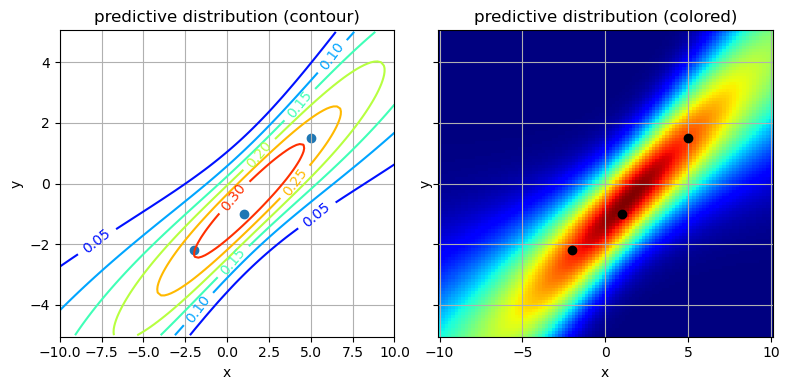

In [36]:
xs = range(-10, 10, length=100)
ys = range(-5, 5, length=100)

density_y = p_predictive.(xs, ys')

fig, axes = subplots(1, 2, sharey=true, figsize=(8, 4))

cs = axes[1].contour(xs, ys, density_y', cmap="jet")
axes[1].clabel(cs, inline=true)
axes[1].scatter(x_obs, y_obs)
set_options(axes[1], "x", "y", "predictive distribution (contour)")

xgrid = repeat(xs', length(ys), 1)
ygrid = repeat(ys, 1, length(xs))
axes[2].pcolormesh(xgrid, ygrid, density_y', cmap="jet", shading="auto")
axes[2].plot(x_obs, y_obs, "ko", label="data")
set_options(axes[2], "x", "y", "predictive distribution (colored)")

tight_layout()

### 厳密解法

$p(y_p|x_p, X, Y) = \mathcal{N}(y_p|\mu_p(x_p), \sigma_p(x_p))$  
$\mu_p(x_p) = \hat{\mu}^Tx_p$  
$\sigma_p(x_p) = \sqrt{\sigma^2 + x_p^T\hat{\Sigma}x_p}$  
$\hat{\Sigma}^{-1} = \sigma^{-2}\sum_{n=1}^{N} x_nx_n^T + \Sigma^{-1}$  
$\hat{\mu} = \hat{\Sigma}(\sigma^{-2}\sum_{n=1}^N x_ny_n + \Sigma^{-1}\mu)$

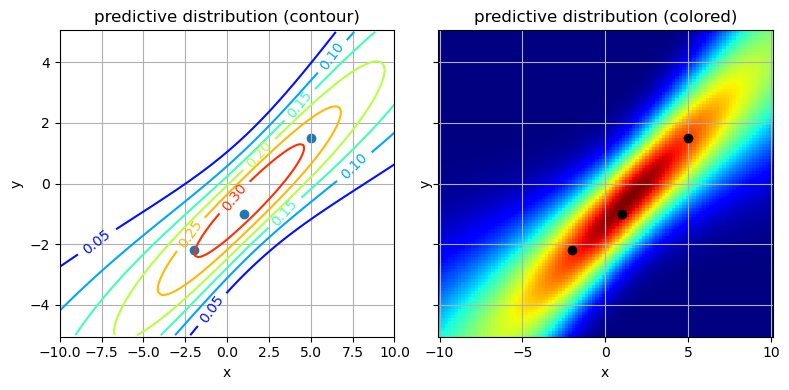

In [37]:
# 切片用の擬似データ
x_extended = hcat(x_obs, ones(size(x_obs)))'

# 事前分布のパラメータ
Σ = [σ₁^2 0;
         0 σ₂^2]
μ = [μ₁, μ₂]

# 事後分布のパラメータ
Σ_hat = inv(σ^(-2) * x_extended*x_extended' + inv(Σ))
μ_hat = Σ_hat * (σ^(-2) * x_extended*y_obs + inv(Σ)*μ)

# 予測分布のパラメータ
μₚ(xₚ) = (μ_hat' * xₚ)[1]
σₚ(xₚ) = sqrt(σ^2 + (xₚ'*Σ_hat*xₚ)[1])

p_predictive_exact(xₚ, yₚ) = pdf(Normal(μₚ(xₚ), σₚ(xₚ)), yₚ)

xs = range(-10, 10, length=100)
ys = range(-5, 5, length=100)

density_y = [p_predictive_exact([x, 1.0], y) for x in xs, y in ys]

fig, axes = subplots(1, 2, sharey=true, figsize=(8, 4))

cs = axes[1].contour(xs, ys, density_y', cmap="jet")
axes[1].clabel(cs, inline=true)
axes[1].scatter(x_obs, y_obs)
set_options(axes[1], "x", "y", "predictive distribution (contour)")

xgrid = repeat(xs', length(ys), 1)
ygrid = repeat(ys, 1, length(xs))
axes[2].pcolormesh(xgrid, ygrid, density_y', cmap="jet", shading="auto")
axes[2].plot(x_obs, y_obs, "ko", label="data")
set_options(axes[2], "x", "y", "predictive distribution (colored)")

tight_layout()

## ロジスティック回帰モデル

### 生成過程

$w_1$ 〜 $\mathcal{N}(w_1|\mu_1, \sigma_1)$  
$w_2$ 〜 $\mathcal{N}(w_2|\mu_2, \sigma_2)$  

$f(x_n) = sig(w_1x_1 + w_2)$  
$y_n$ 〜 $Bernoulli(y_n|f(x_n)) \quad for \quad n = 1, 2, ..., N$ 

In [40]:
sig(x) = 1/(1 + exp(-x))

function generate_logistic(x, μ₁, μ₂, σ₁, σ₂)
    w₁ = rand(Normal(μ₁, σ₁))
    w₂ = rand(Normal(μ₂, σ₂))
    f(x) = sig(w₁*x + w₂)
    y = rand.(Bernoulli.(f.(x)))
    y, f, w₁, w₂
end

generate_logistic (generic function with 1 method)

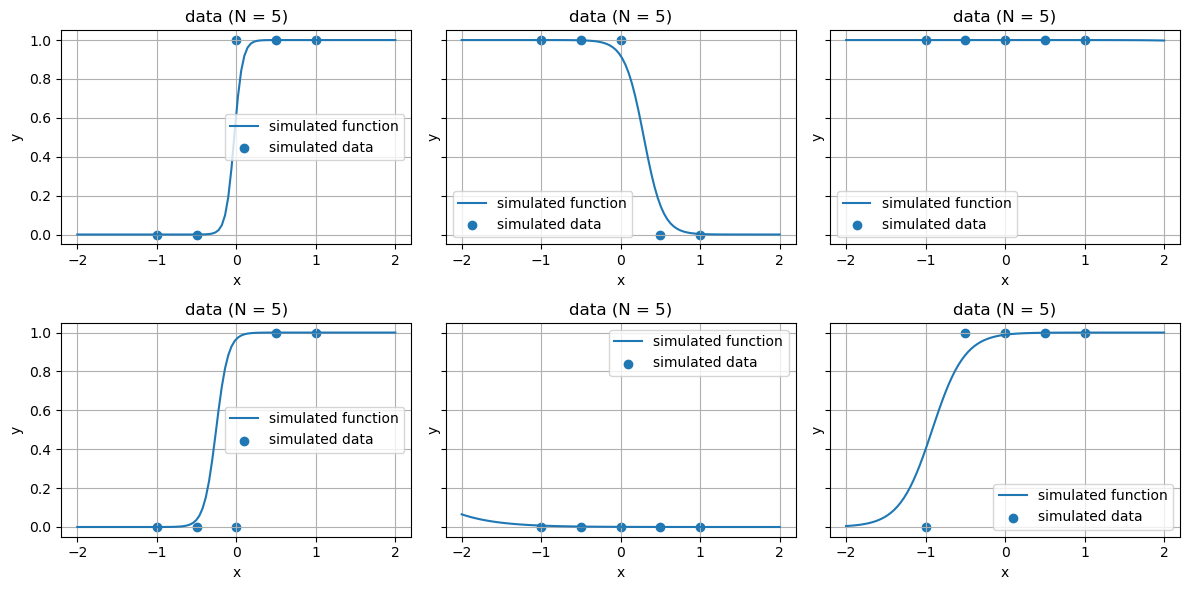

In [46]:
μ₁ = 0
μ₂ = 0
σ₁ = 10.0
σ₂ = 10.0
x = [-1.0, -0.5, 0, 0.5, 1.0]

xs = range(-2, 2, length=100)

fig, axes = subplots(2, 3, sharey=true, figsize=(12, 6))
for ax in axes
    y, f, w₁, w₂ = generate_logistic(x, μ₁, μ₂, σ₁, σ₂)
    
    ax.plot(xs, f.(xs), label="simulated function")
    ax.scatter(x, y, label="simulated data")
    
    set_options(ax, "x", "y", "data (N = $(length(x)))", legend=true)
end
tight_layout()

### 伝承サンプリング

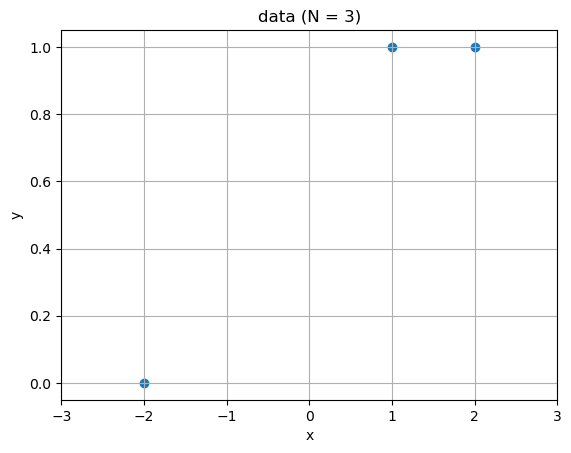

false

In [47]:
x_obs = [-2, 1, 2]

y_obs = Bool.([0, 1, 1])

fig, ax = subplots()
ax.scatter(x_obs, y_obs)
ax.set_xlim([-3, 3])
set_options(ax, "x", "y", "data (N = $(length(x_obs)))")

In [48]:
maxiter = 10_000

param_posterior = Vector{Tuple{Float64, Float64}}()

for i in 1:maxiter
    y, f, w₁, w₂ = generate_logistic(x_obs, μ₁, μ₂, σ₁, σ₂)
    
    y == y_obs && push!(param_posterior, (w₁, w₂))
end

acceptance_rate = length(param_posterior) / maxiter
println("acceptance rate = $(acceptance_rate)")

acceptance rate = 0.2985


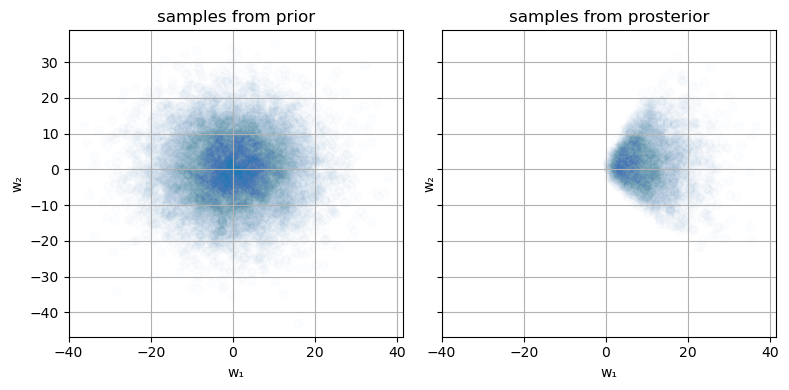

In [49]:
unzip(a) = map(x -> getfield.(a, x), fieldnames(eltype(a)))

param_prior = [generate_logistic(x, μ₁, μ₂, σ₁, σ₂)[3:4] for i in 1:10_000]
w₁_prior, w₂_prior = unzip(param_prior)

w₁_posterior, w₂_posterior = unzip(param_posterior)

fig, axes = subplots(1, 2, sharex=true, sharey=true, figsize=(8, 4))

axes[1].scatter(w₁_prior, w₂_prior, alpha=0.01)
set_options(axes[1], "w₁", "w₂", "samples from prior")

axes[2].scatter(w₁_posterior, w₂_posterior, alpha=0.01)
set_options(axes[2], "w₁", "w₂", "samples from prosterior")

tight_layout()

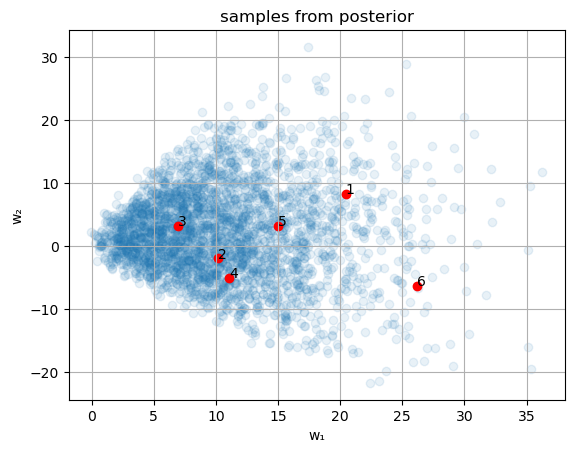

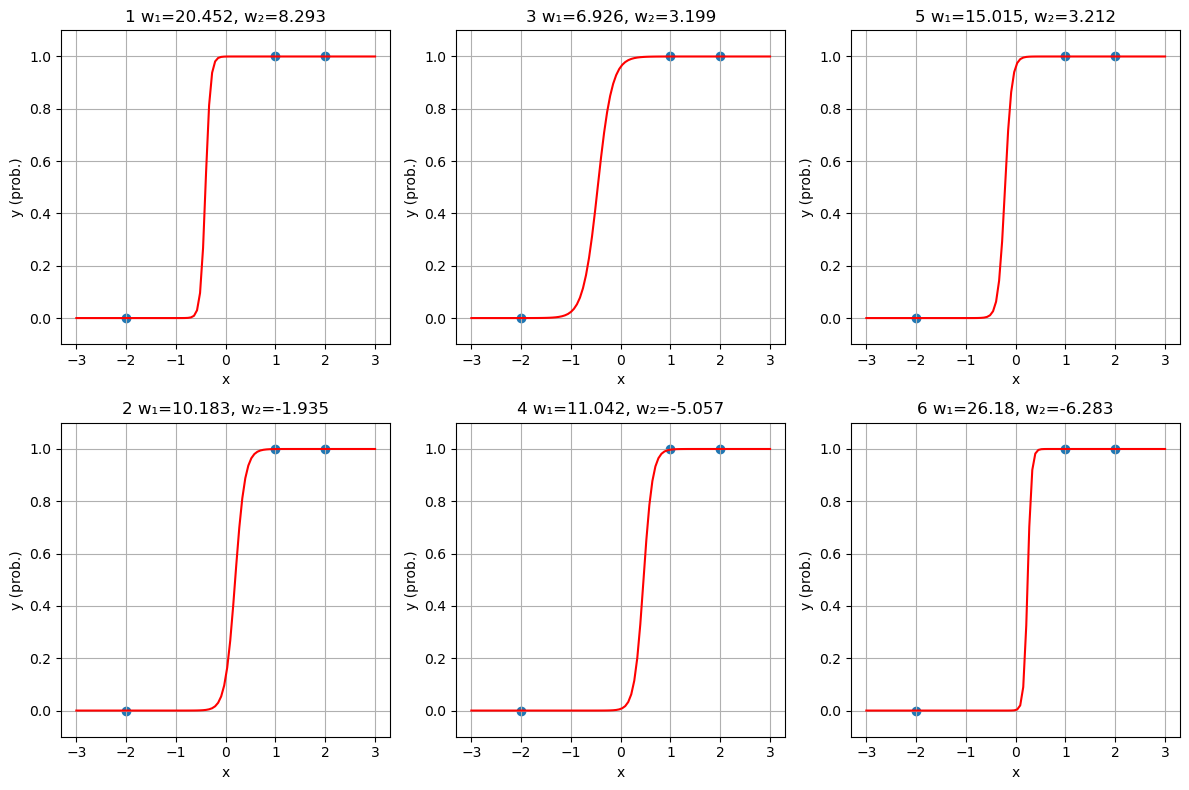

In [51]:
xs = range(-3, 3, length=100)

fig, ax = subplots()
ax.scatter(w₁_posterior, w₂_posterior, alpha=0.1)
set_options(ax, "w₁", "w₂", "samples from posterior")

fig, axes = subplots(2, 3, figsize=(12, 8))
for i in eachindex(axes)
    j = round(Int, length(param_posterior)*rand()) + 1
    w₁, w₂ = param_posterior[j]
    
    ax.scatter(w₁, w₂, color="r")
    ax.text(w₁, w₂, i)
    
    f(x) = sig(w₁*x+w₂)
    axes[i].plot(xs, f.(xs), "r")
    
    axes[i].scatter(x_obs, y_obs)
    
    axes[i].set_ylim([-0.1, 1.1])
    set_options(axes[i], "x", "y (prob.)", "$(i) w₁=$(round(w₁, digits=3)), w₂=$(round(w₂, digits=3))")
end
tight_layout()

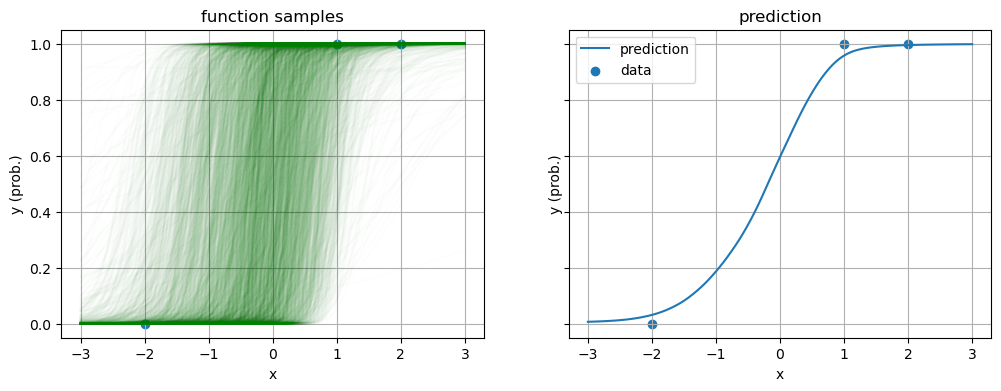

PyObject <matplotlib.legend.Legend object at 0x7fb62f208100>

In [55]:
fig, axes = subplots(1, 2, sharey=true, figsize=(12, 4))

fs = []

for (i, param) in enumerate(param_posterior)
    w₁, w₂ = param
    
    f(x) = sig(w₁*x+w₂)
    axes[1].plot(xs, f.(xs), "g", alpha=0.01)
    
    push!(fs, f.(xs))
end
axes[1].scatter(x_obs, y_obs)
set_options(axes[1], "x", "y (prob.)", "function samples")

axes[2].plot(xs, mean(fs), label="prediction")
axes[2].scatter(x_obs, y_obs, label="data")
set_options(axes[2], "x", "y (prob.)", "prediction", legend=true)

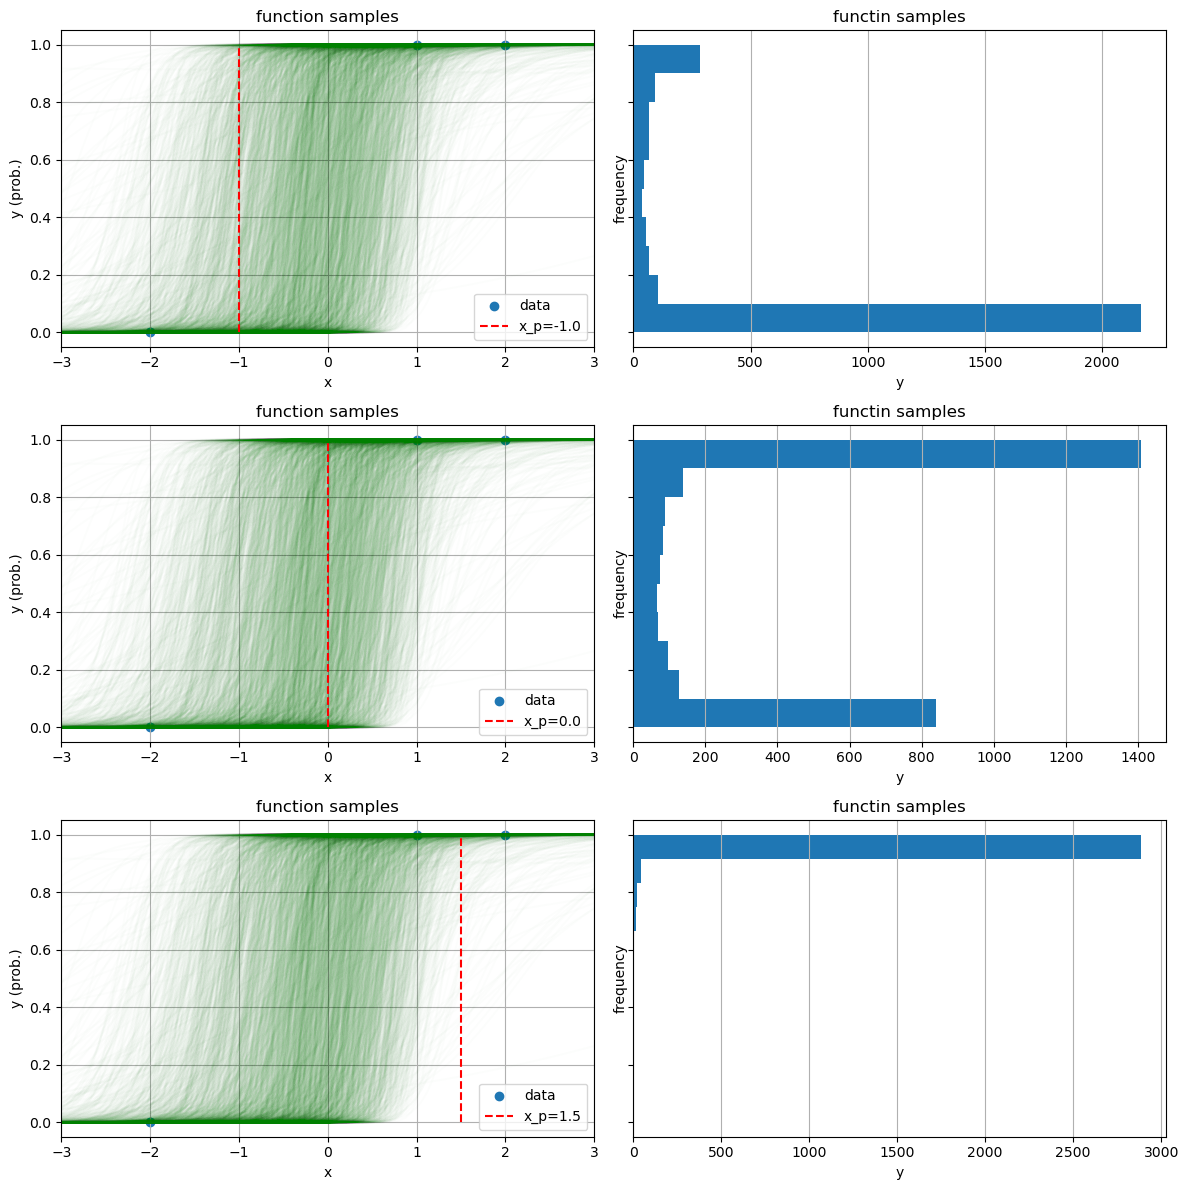

In [61]:
x_list = [-1.0, 0.0, 1.5]

fig_num = length(x_list)

fig, axes = subplots(fig_num, 2, sharey=true, figsize=(12, 4*fig_num))

for (j, x) in enumerate(x_list)
    for (i, param) in enumerate(param_posterior)
        w₁, w₂ = param

        f(x) = sig(w₁*x+w₂)
        axes[j].plot(xs, f.(xs), "g", alpha=0.01)
    end
    axes[j].scatter(x_obs, y_obs, label="data")
    
    axes[j].plot([x, x], [0, 1], "r--", label="x_p=$(x)")
    
    axes[j].set_xlim(extrema(xs))
    set_options(axes[j], "x", "y (prob.)", "function samples")
    axes[j].legend(loc="lower right")
    
    probs = [sig(param[1]*x+param[2]) for param in param_posterior]
    axes[j+fig_num].hist(probs, orientation="horizontal")
    set_options(axes[j+fig_num], "y", "frequency", "functin samples"; grid=false)
    axes[j+fig_num].grid(axis="x")
end
tight_layout()

### 数値積分

In [66]:
p_joint(x, y, w₁, w₂) = prod(pdf.(Bernoulli.(sig.(w₁.*x.+w₂)), y)) * pdf(Normal(μ₁, σ₁), w₁) * pdf(Normal(μ₂, σ₂), w₂)

w_range = range(-30, 30, length=100)

p_marginal = approx_integration_2D(w_range, p_joint)
p_marginal(x_obs, y_obs)

0.2966829565005522

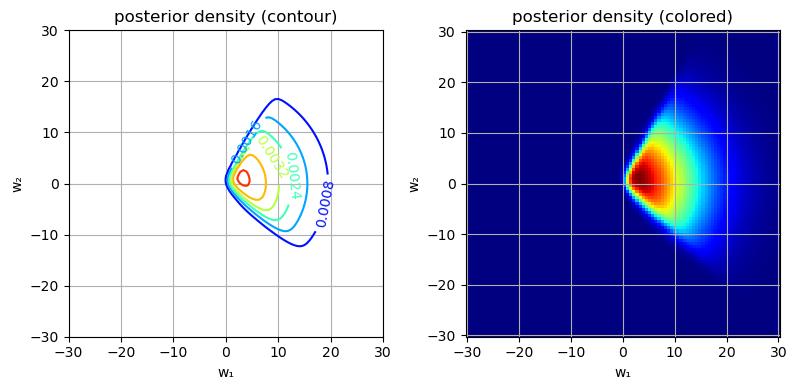

In [67]:
# 事後分布の計算
w_posterior = [p_joint(x_obs, y_obs, w₁, w₂) for w₁ in w_range, w₂ in w_range] ./ p_marginal(x_obs, y_obs)

fig, axes = subplots(1, 2, figsize=(8, 4))

cs = axes[1].contour(w_range, w_range, w_posterior' .+ eps(), cmap="jet")
axes[1].clabel(cs, inline=true)
set_options(axes[1], "w₁", "w₂", "posterior density (contour)")

xgrid = repeat(w_range', length(w_range), 1)
ygrid = repeat(w_range, 1, length(w_range))
axes[2].pcolormesh(xgrid, ygrid, w_posterior', cmap="jet", shading="auto")
set_options(axes[2], "w₁", "w₂", "posterior density (colored)")

tight_layout()

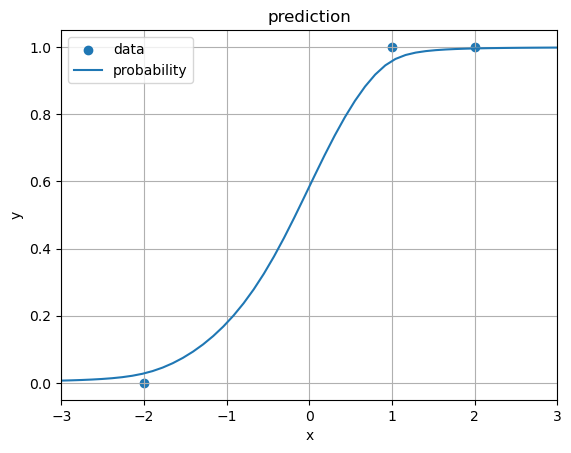

PyObject <matplotlib.legend.Legend object at 0x7fb61c627f70>

In [70]:
p_likelihood(xₚ, yₚ, w₁, w₂) = pdf(Bernoulli(sig(w₁*xₚ+w₂)), yₚ)
p_predictive = approx_predictive(w_posterior, w_range, p_likelihood)

xs = range(-3, 3, length=50)

fig, ax = subplots()
ax.scatter(x_obs, y_obs, label="data")
ax.plot(xs, p_predictive.(xs, 1), label="probability")
ax.set_xlim([-3, 3])
set_options(ax, "x", "y", "prediction", legend=true)